# Graphene

This notebook is to look at the band structure of graphene

Version 1.0, updated 15/10/2021 by AJM

## Import packages

To streamline operations in Python, packages can be imported to perform a host of various tasks. To make this process as simple as possible, all the required packages are included in the file _[SSP.py](https://github.com/Andy-UTAS/Solid-state/blob/master/SSP.py)_ and thus we can import all of the content: 

In [2]:
from SSP import *

## Tight binding model

### Dispersion sufrace

To look at the band strucutre, we need to somehow construct the dispersion relation. This is done using the tight binding model, with the result shown below:

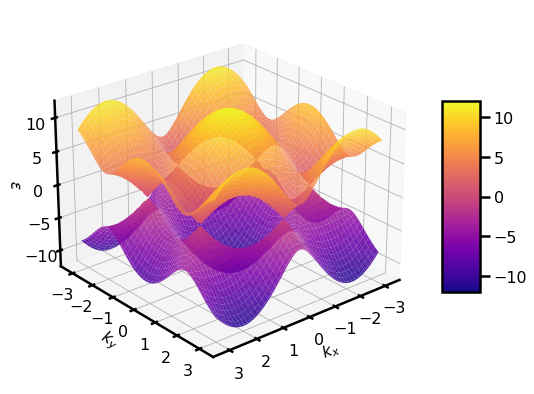

In [3]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 
# Axes3D import has side effects, it enables using projection='3d' in add_subplot

a = 1 # unit cell length
t = 4 # hopping

# Eigenvalues (energies) of tight-binding bands
def ep(kx, ky, excited = False):
    f = 2 * np.cos(np.sqrt(3) * ky * a) + 4 * np.cos((3/2) * kx *a) * np.cos((np.sqrt(3)/2) * ky *a)
    E = - t * np.sqrt(3 + f)
    if excited:
        E *= -1
    return E

""" Make a figure of band strucutre """
# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create x, y points
x = y = np.arange(-np.pi/a, np.pi/a, 0.01)
X, Y = np.meshgrid(x, y)

# Conduction band
zs = np.array(ep(np.ravel(X), np.ravel(Y), True))
Z = zs.reshape(X.shape)
# Valence band
zs_ = np.array(ep(np.ravel(X), np.ravel(Y)))
Z_ = zs_.reshape(X.shape)

# Set up aesthetics
ax.view_init(azim=50, elev=25)
zmax, zmin = max(zs), min(zs_)
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_y$')
ax.set_zlabel(r'$\epsilon$')

# Plot the data
surf = ax.plot_surface(X, Y, Z, cmap='plasma', vmin=zmin, vmax=zmax, alpha = .85)
ax.plot_surface(X, Y, Z_, cmap='plasma', vmin=zmin, vmax=zmax, alpha = .85)

# Include a legend
fig.colorbar(surf, shrink=0.5, aspect=5)  

# Save the figure
if False:
    plt.savefig('Graphene-disp.pdf', facecolor='white', transparent=False, bbox_inches='tight')

plt.show()

### Contour plot

A contour plot of the valence band, with the unit cell in reciprocal space

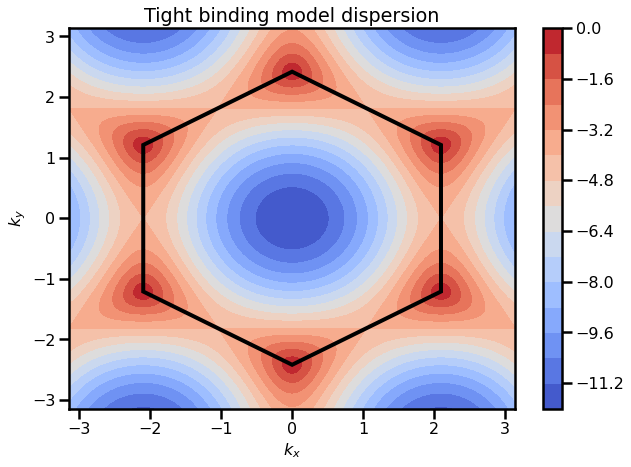

In [4]:
fig,ax=plt.subplots(1,1)

cp = ax.contourf(X, Y, Z_, 15, cmap=cm.coolwarm)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Tight binding model dispersion')
ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')

""" Draw the unit cell """
# wavevector magnitiude
K = (2*np.pi)/(3*np.sqrt(3)*a)

# Coordinates of the points of a hexagon with |x| = 2
points = np.array([
        (0,2),
        (-np.sqrt(3),1),
        (-np.sqrt(3),-1),
        (0,-2),
        (np.sqrt(3),-1),
        (np.sqrt(3),1),
        (0,2)
])

# Scale the points to get the unit cell in reciprocal space
points *= K

# uses _patches_ to draw the shape
p = matplotlib.patches.Polygon(points, edgecolor = 'black', linewidth=4, fill = False)

ax.add_patch(p)

# Save the figure
if False:
    plt.savefig('Graphenecontour.pdf', facecolor='white', transparent=False, bbox_inches='tight')

plt.show()

## Band filling

By setting the ratio of electrons to available states, one can look at how the band fill be filled

In [ ]:
# Set the ratio of electrons to available states
fillingfraction = 1 # states to electrons

# The ration must be greater than 1
if fillingfraction < 1:
    fillingfraction = 1

try:
    maxfilled = np.sort(zs_)[int(len(zs_)/fillingfraction)-1]
    for z in Z_:
        z[z>round(maxfilled)] = None
except ValueError:
    # Valence band
    zs_ = np.array(ep(np.ravel(X), np.ravel(Y)))
    Z_ = zs_.reshape(X.shape)
    
    maxfilled = np.sort(zs_)[int(len(zs_)/statestoe)-1]
    for z in Z_:
        z[z>round(maxfilled)] = None

fig,ax=plt.subplots(1,1)

cp = ax.contourf(X, Y, Z_, 11, cmap='binary')
fig.colorbar(cp) # Add a colorbar to a plot

path = matplotlib.patches.Path(points)
clip = matplotlib.patches.PathPatch(path, transform=ax.transData)
for contour in cp.collections:
        contour.set_clip_path(clip)
     
        
ax.set_title('Monovalent tight binding system')
ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')

if False:
    plt.savefig('Graphene-monovalent.pdf', facecolor='white', transparent=False, bbox_inches='tight')

plt.show()